In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Spam/enron_spam_data.csv')

In [3]:
df.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [4]:
df.isna().sum()

,0
Message ID,0
Subject,289
Message,371
Spam/Ham,0
Date,0


In [5]:
df = df[~(df['Subject'].isna() & df['Message'].isna())]

In [6]:
df.isna().sum()

,0
Message ID,0
Subject,238
Message,320
Spam/Ham,0
Date,0


In [7]:
df = df.dropna(subset=['Message'])

In [8]:
df.isna().sum()

,0
Message ID,0
Subject,238
Message,0
Spam/Ham,0
Date,0


In [9]:
df['Subject'] = df['Subject'].fillna('No Subject')


In [10]:
df.isna().sum()

,0
Message ID,0
Subject,0
Message,0
Spam/Ham,0
Date,0


In [11]:
df['text'] = df['Subject'] + df['Message']

In [12]:
df.head()

,Message ID,Subject,Message,Spam/Ham,Date,text
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,"vastar resources , inc .gary , production from..."
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,calpine daily gas nomination- calpine daily ga...
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,re : issuefyi - see note below - already done ...
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,meter 7268 nov allocationfyi .\n- - - - - - - ...
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14,"mcmullen gas for 11 / 99jackie ,\nsince the in..."


In [13]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [14]:
import re

def clean_text(text):
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', str(text))
    text = re.sub(r'[^\w\s.,!?ёЁа-яА-Яa-zA-Z0-9]', '', str(text))
    text = re.sub(r'[^а-яА-ЯёЁa-zA-Z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    cleaned_text = re.sub(r'\s+', ' ', text).strip()
    return text

In [15]:
df['clean text'] = df['text'].apply(clean_text)

In [16]:
df.head()

Message ID                       Subject  \
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   
5           5      mcmullen gas for 11 / 99   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [17]:
import re

# Функция для подсчета восклицательных знаков и спецсимволов (!, $, % и т.д.)
def count_special_chars(text):
    if isinstance(text, str):
        return len(re.findall(r'[!$%&*#@]', text))  # Поиск заданных символов
    return 0

# Создаем новый столбец с количеством спецсимволов
df['Special Char Count'] = df['text'].apply(count_special_chars)


In [18]:
df[['Message', 'Special Char Count']].head()

Message  \
1  gary , production from the high island larger block a - 1 # 2 commenced on\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\ndaren j farmer\n12 / 10 / 99 10 : 38 am\nto : carlos j rodriguez / hou / ect @ ect\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ncarlos ,\nplease call linda and get everything set up .\ni ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\nfollowing day based on my conversations with bill fischer at bmar .\nd .\n- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : george weissman 12 / 10 / 99 10 : 00 am\nto : daren j farmer / hou / ect @ ect\ncc : gary bryan / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ndarren ,\nthe attached appears to be a nomination from vastar resources , inc . for the\nhigh island larger block a - 1 # 2 ( previously , erroneously referred to as the\n# 1 well ) . vastar now expects the well to commence production sometime\ntomorrow . i told linda harris that we ' d get her a telephone number in gas\ncontrol so she can provide notification of the turn - on tomorrow . linda ' s\nnumbers , for the record , are 281 . 584 . 3359 voice and 713 . 312 . 1689 fax .\nwould you please see that someone contacts linda and advises her how to\nsubmit future nominations via e - mail , fax or voice ? thanks .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 10 / 99 09 : 44\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\n" linda harris " on 12 / 10 / 99 09 : 38 : 43 am\nto : george weissman / hou / ect @ ect\ncc :\nsubject : hi a - 1 # 2\neffective 12 - 11 - 99\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| mscf / d | min ftp | time |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 4 , 500 | 9 , 925 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 6 , 000 | 9 , 908 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 8 , 000 | 9 , 878 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 10 , 000 | 9 , 840 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 12 , 000 | 9 , 793 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 14 , 000 | 9 , 738 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 16 , 000 | 9 , 674 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 18 , 000 | 9 , 602 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 20 , 000 | 9 , 521 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 22 , 000 | 9 , 431 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 24 , 000 | 9 , 332 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 26 , 000 | 9 , 224 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 28 , 000 | 9 , 108 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 30 , 000 | 8 , 982 | 24 hours |\n| | | |\n| - - - - - - - -

In [19]:
import re

# Функция для проверки наличия URL-ссылок в тексте
def contains_url(text):
    if isinstance(text, str):
        # Регулярное выражение для поиска ссылок (http, https, www)
        url_pattern = r'(https?://\S+|www\.\S+)'
        return 1 if re.search(url_pattern, text) else 0
    return 0

# Создаем новый столбец с наличием URL
df['Contains URL'] = df['text'].apply(contains_url)

# Проверяем результат
df[['text', 'Contains URL']].head()

text  \
1  vastar resources , inc .gary , production from the high island larger block a - 1 # 2 commenced on\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\ndaren j farmer\n12 / 10 / 99 10 : 38 am\nto : carlos j rodriguez / hou / ect @ ect\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ncarlos ,\nplease call linda and get everything set up .\ni ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\nfollowing day based on my conversations with bill fischer at bmar .\nd .\n- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : george weissman 12 / 10 / 99 10 : 00 am\nto : daren j farmer / hou / ect @ ect\ncc : gary bryan / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ndarren ,\nthe attached appears to be a nomination from vastar resources , inc . for the\nhigh island larger block a - 1 # 2 ( previously , erroneously referred to as the\n# 1 well ) . vastar now expects the well to commence production sometime\ntomorrow . i told linda harris that we ' d get her a telephone number in gas\ncontrol so she can provide notification of the turn - on tomorrow . linda ' s\nnumbers , for the record , are 281 . 584 . 3359 voice and 713 . 312 . 1689 fax .\nwould you please see that someone contacts linda and advises her how to\nsubmit future nominations via e - mail , fax or voice ? thanks .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 10 / 99 09 : 44\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\n" linda harris " on 12 / 10 / 99 09 : 38 : 43 am\nto : george weissman / hou / ect @ ect\ncc :\nsubject : hi a - 1 # 2\neffective 12 - 11 - 99\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| mscf / d | min ftp | time |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 4 , 500 | 9 , 925 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 6 , 000 | 9 , 908 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 8 , 000 | 9 , 878 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 10 , 000 | 9 , 840 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 12 , 000 | 9 , 793 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 14 , 000 | 9 , 738 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 16 , 000 | 9 , 674 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 18 , 000 | 9 , 602 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 20 , 000 | 9 , 521 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 22 , 000 | 9 , 431 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 24 , 000 | 9 , 332 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 26 , 000 | 9 , 224 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 28 , 000 | 9 , 108 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 30 , 000 | 8 , 982 | 24 hours |\n| | |

In [20]:
import re

# Функция для проверки наличия HTML-тегов в тексте
def contains_html_tags(text):
    if isinstance(text, str):
        # Регулярное выражение для поиска HTML-тегов
        html_pattern = r'<[^>]+>'
        return 1 if re.search(html_pattern, text) else 0
    return 0

# Создаем новый столбец 'Contains HTML', который показывает наличие HTML-тегов
df['Contains HTML'] = df['text'].apply(contains_html_tags)

In [21]:
df[['Message', 'Contains HTML']].head()

Message  \
1  gary , production from the high island larger block a - 1 # 2 commenced on\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\ndaren j farmer\n12 / 10 / 99 10 : 38 am\nto : carlos j rodriguez / hou / ect @ ect\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ncarlos ,\nplease call linda and get everything set up .\ni ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\nfollowing day based on my conversations with bill fischer at bmar .\nd .\n- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : george weissman 12 / 10 / 99 10 : 00 am\nto : daren j farmer / hou / ect @ ect\ncc : gary bryan / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ndarren ,\nthe attached appears to be a nomination from vastar resources , inc . for the\nhigh island larger block a - 1 # 2 ( previously , erroneously referred to as the\n# 1 well ) . vastar now expects the well to commence production sometime\ntomorrow . i told linda harris that we ' d get her a telephone number in gas\ncontrol so she can provide notification of the turn - on tomorrow . linda ' s\nnumbers , for the record , are 281 . 584 . 3359 voice and 713 . 312 . 1689 fax .\nwould you please see that someone contacts linda and advises her how to\nsubmit future nominations via e - mail , fax or voice ? thanks .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 10 / 99 09 : 44\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\n" linda harris " on 12 / 10 / 99 09 : 38 : 43 am\nto : george weissman / hou / ect @ ect\ncc :\nsubject : hi a - 1 # 2\neffective 12 - 11 - 99\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| mscf / d | min ftp | time |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 4 , 500 | 9 , 925 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 6 , 000 | 9 , 908 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 8 , 000 | 9 , 878 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 10 , 000 | 9 , 840 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 12 , 000 | 9 , 793 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 14 , 000 | 9 , 738 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 16 , 000 | 9 , 674 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 18 , 000 | 9 , 602 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 20 , 000 | 9 , 521 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 22 , 000 | 9 , 431 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 24 , 000 | 9 , 332 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 26 , 000 | 9 , 224 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 28 , 000 | 9 , 108 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 30 , 000 | 8 , 982 | 24 hours |\n| | | |\n| - - - - - - - -

In [22]:
def message_length(text):
    return len(text) if isinstance(text, str) else 0

In [23]:
df['Message Length'] = df['clean text'].apply(message_length)  # Длина сообщения

In [24]:
df.head()

Message ID                       Subject  \
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   
5           5      mcmullen gas for 11 / 99   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [25]:
import re


def unique_word_count(text):
    if isinstance(text, str):
        words = text.split()
        return len(set(words))
    return 0

# Функция для подсчета доли символов и чисел
def symbols_and_digits_ratio(text):
    if isinstance(text, str):
        total_chars = len(text)
        symbols_digits = sum(1 for char in text if char.isdigit() or not char.isalnum())
        return symbols_digits / total_chars if total_chars > 0 else 0
    return 0

# Добавляем новые признаки в DataFrame
df['Unique Word Count'] = df['clean text'].apply(unique_word_count)
df['Symbols and Digits Ratio'] = df['Message'].apply(symbols_and_digits_ratio)

# Проверяем результат
df[['Message', 'Unique Word Count', 'Symbols and Digits Ratio']].head()


Message  \
1  gary , production from the high island larger block a - 1 # 2 commenced on\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\ndaren j farmer\n12 / 10 / 99 10 : 38 am\nto : carlos j rodriguez / hou / ect @ ect\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ncarlos ,\nplease call linda and get everything set up .\ni ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\nfollowing day based on my conversations with bill fischer at bmar .\nd .\n- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\nenron north america corp .\nfrom : george weissman 12 / 10 / 99 10 : 00 am\nto : daren j farmer / hou / ect @ ect\ncc : gary bryan / hou / ect @ ect , melissa graves / hou / ect @ ect\nsubject : vastar resources , inc .\ndarren ,\nthe attached appears to be a nomination from vastar resources , inc . for the\nhigh island larger block a - 1 # 2 ( previously , erroneously referred to as the\n# 1 well ) . vastar now expects the well to commence production sometime\ntomorrow . i told linda harris that we ' d get her a telephone number in gas\ncontrol so she can provide notification of the turn - on tomorrow . linda ' s\nnumbers , for the record , are 281 . 584 . 3359 voice and 713 . 312 . 1689 fax .\nwould you please see that someone contacts linda and advises her how to\nsubmit future nominations via e - mail , fax or voice ? thanks .\ngeorge x 3 - 6992\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 10 / 99 09 : 44\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\n" linda harris " on 12 / 10 / 99 09 : 38 : 43 am\nto : george weissman / hou / ect @ ect\ncc :\nsubject : hi a - 1 # 2\neffective 12 - 11 - 99\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| mscf / d | min ftp | time |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 4 , 500 | 9 , 925 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 6 , 000 | 9 , 908 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 8 , 000 | 9 , 878 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 10 , 000 | 9 , 840 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 12 , 000 | 9 , 793 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 14 , 000 | 9 , 738 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 16 , 000 | 9 , 674 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 18 , 000 | 9 , 602 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 20 , 000 | 9 , 521 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 22 , 000 | 9 , 431 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 24 , 000 | 9 , 332 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 26 , 000 | 9 , 224 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 28 , 000 | 9 , 108 | 24 hours |\n| | | |\n| - - - - - - - - + - - - - - - - - - - + - - - - - - - - - - - |\n| | | |\n| 30 , 000 | 8 , 982 | 24 hours |\n| | | |\n| - - - - - - - -

In [26]:
output_path = '/content/drive/MyDrive/Colab Notebooks/Project/last1.csv'
df.to_csv(output_path, index=False)

In [27]:
df.head()

Message ID                       Subject  \
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   
5           5      mcmullen gas for 11 / 99   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [28]:
import re

# Функция для подсчета количества чисел в тексте
def count_numbers(text):
    if isinstance(text, str):
        numbers = re.findall(r'\d+', text)  # Находим все числа в тексте
        return len(numbers)  # Возвращаем количество чисел
    return 0

# Применяем функцию к столбцу 'Processed Text'
df['Number Count'] = df['clean text'].apply(count_numbers)

# Проверяем результат
df[['clean text', 'Number Count']].head()


,clean text,Number Count
1,"vastar resources , inc .gary , production from the high island larger block a 1 2 commenced on saturday at 2 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and 10 , 000 gross for tomorrow . vastar owns 68 of the gross production . george x 3 6992 forwarded by george weissman hou ect on 12 13 99 10 16 am daren j farmer 12 10 99 10 38 am to carlos j rodriguez hou ect ect cc george weissman hou ect ect , melissa graves hou ect ect subject vastar resources , inc . carlos , please call linda and get everything set up . i m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each following day based on my conversations with bill fischer at bmar . d . forwarded by daren j farmer hou ect on 12 10 99 10 34 am enron north america corp . from george weissman 12 10 99 10 00 am to daren j farmer hou ect ect cc gary bryan hou ect ect , melissa graves hou ect ect subject vastar resources , inc . darren , the attached appears to be a nomination from vastar resources , inc . for the high island larger block a 1 2 previously , erroneously referred to as the 1 well . vastar now expects the well to commence production sometime tomorrow . i told linda harris that we d get her a telephone number in gas control so she can provide notification of the turn on tomorrow . linda s numbers , for the record , are 281 . 584 . 3359 voice and 713 . 312 . 1689 fax . would you please see that someone contacts linda and advises her how to submit future nominations via e mail , fax or voice ? thanks . george x 3 6992 forwarded by george weissman hou ect on 12 10 99 09 44 am linda harris on 12 10 99 09 38 43 am to george weissman hou ect ect cc subject hi a 1 2 effective 12 11 99 mscf d min ftp time 4 , 500 9 , 925 24 hours 6 , 000 9 , 908 24 hours 8 , 000 9 , 878 24 hours 10 , 000 9 , 840 24 hours 12 , 000 9 , 793 24 hours 14 , 000 9 , 738 24 hours 16 , 000 9 , 674 24 hours 18 , 000 9 , 602 24 hours 20 , 000 9 , 521 24 hours 22 , 000 9 , 431 24 hours 24 , 000 9 , 332 24 hours 26 , 000 9 , 224 24 hours 28 , 000 9 , 108 24 hours 30 , 000 8 , 982 24 hours 32 , 000 8 , 847 24 hours 34 , 000 8 , 703 24 hours 36 , 000 8 , 549 24 hours",149
2,calpine daily gas nomination calpine daily gas nomination 1 . doc,1
3,"re issuefyi see note below already done . stella forwarded by stella l morris hou ect on 12 14 99 10 18 am from sherlyn schumack on 12 14 99 10 06 am to stella l morris hou ect ect cc howard b camp hou ect ect subject re issue stella , this has already been taken care of . you did this for me yesterday . thanks . howard b camp 12 14 99 09 10 am to stella l morris hou ect ect cc sherlyn schumack hou ect ect , howard b camp hou ect ect , stacey neuweiler hou ect ect , daren j farmer hou ect ect subject issue stella , can you work with stacey or daren to resolve hc forwarded by howard b camp hou ect on 12 14 99 09 08 am from sherlyn schumack 12 13 99 01 14 pm to howard b camp hou ect ect cc subject issue i have to create accounting arrangement for purchase from unocal energy at meter 986782 . deal not tracked for 5 99 . volume on deal 114427 expired 4 99 .",31
4,"meter 7268 nov allocationfyi . forwarded by lauri a allen hou ect on 12 14 99 12 17 pm kimberly vaughn 12 10 99 02 54 pm to lauri a allen hou ect ect cc mary m smith hou ect ect subject meter 7268 nov allocation lauri . . i have put this on strangas gas until i can get a contract from daren . forwarded by kimberly vaughn hou ect on 12 10 99 01 52 pm lauri a allen 12 09 99 01 20 pm to kimberly vaughn hou ect ect , anita luong hou ect ect cc howard b camp hou ect ect , mary m smith hou ect ect subject meter 7268 nov allocation kim anita a volume of 7247 mm shows to have been allocated to the reliant 201 contract for november . there was no nomination for reliant at this point in november and , therefore , there should be no volume allocated to their contract . please make sure these volumes are moved off the reliant contract prior to november

In [29]:
import spacy

# Загружаем английскую модель spaCy
nlp = spacy.load("en_core_web_sm")

# Функция для предобработки текста
def preprocess_text(text):
    if isinstance(text, str):
        doc = nlp(text)  # Обрабатываем текст с помощью spaCy
        # Лемматизация и удаление стоп-слов, чисел и специальных символов
        clean_tokens = [
            token.lemma_ for token in doc
            if not token.is_stop and not token.is_punct and not token.is_digit and token.is_alpha
        ]
        return " ".join(clean_tokens)  # Возвращаем обработанный текст
    return ""

# Применяем функцию к столбцу 'Message'
df['Processed Text'] = df['clean text'].apply(preprocess_text)

# Проверяем результат
df[['clean text', 'Processed Text']].head()


,clean text,Processed Text
1,"vastar resources , inc .gary , production from the high island larger block a 1 2 commenced on saturday at 2 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and 10 , 000 gross for tomorrow . vastar owns 68 of the gross production . george x 3 6992 forwarded by george weissman hou ect on 12 13 99 10 16 am daren j farmer 12 10 99 10 38 am to carlos j rodriguez hou ect ect cc george weissman hou ect ect , melissa graves hou ect ect subject vastar resources , inc . carlos , please call linda and get everything set up . i m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each following day based on my conversations with bill fischer at bmar . d . forwarded by daren j farmer hou ect on 12 10 99 10 34 am enron north america corp . from george weissman 12 10 99 10 00 am to daren j farmer hou ect ect cc gary bryan hou ect ect , melissa graves hou ect ect subject vastar resources , inc . darren , the attached appears to be a nomination from vastar resources , inc . for the high island larger block a 1 2 previously , erroneously referred to as the 1 well . vastar now expects the well to commence production sometime tomorrow . i told linda harris that we d get her a telephone number in gas control so she can provide notification of the turn on tomorrow . linda s numbers , for the record , are 281 . 584 . 3359 voice and 713 . 312 . 1689 fax . would you please see that someone contacts linda and advises her how to submit future nominations via e mail , fax or voice ? thanks . george x 3 6992 forwarded by george weissman hou ect on 12 10 99 09 44 am linda harris on 12 10 99 09 38 43 am to george weissman hou ect ect cc subject hi a 1 2 effective 12 11 99 mscf d min ftp time 4 , 500 9 , 925 24 hours 6 , 000 9 , 908 24 hours 8 , 000 9 , 878 24 hours 10 , 000 9 , 840 24 hours 12 , 000 9 , 793 24 hours 14 , 000 9 , 738 24 hours 16 , 000 9 , 674 24 hours 18 , 000 9 , 602 24 hours 20 , 000 9 , 521 24 hours 22 , 000 9 , 431 24 hours 24 , 000 9 , 332 24 hours 26 , 000 9 , 224 24 hours 28 , 000 9 , 108 24 hours 30 , 000 8 , 982 24 hours 32 , 000 8 , 847 24 hours 34 , 000 8 , 703 24 hours 36 , 000 8 , 549 24 hours",vastar resource inc production high island large block commence saturday p m gross carlos expect gross tomorrow vastar own gross production george x forward george weissman hou ect daren j farmer carlos j rodriguez hou ect ect cc george weissman hou ect ect melissa grave hou ect ect subject vastar resource inc carlos linda set m go estimate come tomorrow increase follow day base conversation bill fischer bmar d forward daren j farmer hou ect enron north america corp george weissman daren j farmer hou ect ect cc gary bryan hou ect ect melissa grave hou ect ect subject vastar resource inc darren attach appear nomination vastar resource inc high island large block previously erroneously refer vastar expect commence production tomorrow tell linda harris d telephone number gas control provide notification turn tomorrow linda s number record voice fax contact linda advise submit future nomination e mail fax voice thank george x forward george weissman hou ect linda harris george weissman hou ect ect cc subject hi effective mscf d min ftp time hour hour hour hour hour hour hour hour hour hour hour hour hour hour hour hour hour
2,calpine daily gas nomination calpine daily gas nomination 1 . doc,calpine daily gas nomination calpine daily gas nomination doc
3,"re issuefyi see note below already done . stella forwarded by stella l morris hou ect on 12 14 99 10 18 am from sherlyn schumack on 12 14 99 10 06 am to stella l morris hou ect ect cc howard b camp hou ect ect subject re issue stella , this has already been taken care of . you did this for me yesterday . thanks . howard b camp 12 14 99 09 10 am to stella l morris hou ect ect cc sherlyn schumack hou ect ect , howard b camp hou ect ect , stacey neuweiler hou ect ect , daren j farmer hou ect ect subject issue stella , can you 

In [30]:
df.head(1)

Message ID                   Subject  \
1           1  vastar resources , inc .   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Инициализация TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,       # Ограничиваем количество признаков
    ngram_range=(1,2),       # Учитываем униграммы и биграммы
    stop_words='english'     # Удаляем стандартные английские стоп-слова
)

# Векторизуем текст из колонки 'Processed Text'
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed Text'])

# Извлекаем дополнительные числовые признаки
numeric_features = df[['Special Char Count', 'Contains URL', 'Contains HTML',
                           'Message Length', 'Unique Word Count',
                           'Symbols and Digits Ratio', 'Number Count']].values

# Объединяем TF-IDF матрицу с числовыми признаками
from scipy.sparse import hstack
combined_features = hstack([tfidf_matrix, numeric_features])

# Проверяем размеры
print("Размер TF-IDF матрицы:", tfidf_matrix.shape)
print("Размер числовых признаков:", numeric_features.shape)
print("Размер объединенной матрицы:", combined_features.shape)


Размер TF-IDF матрицы: (33345, 5000)
Размер числовых признаков: (33345, 7)
Размер объединенной матрицы: (33345, 5007)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Целевая переменная
y = df['Spam/Ham'].map({'ham': 0, 'spam': 1})  # Преобразуем метки в 0 и 1

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    combined_features, y, test_size=0.2, random_state=42, stratify=y
)

# Обучение модели LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = svm_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Точность модели (Accuracy):", accuracy)
print("F1-мера:", f1)
print("\nОтчет о классификации:\n", classification_report(y_test, y_pred))


Точность модели (Accuracy): 0.9865047233468286
F1-мера: 0.9867139061116031

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3299
           1       0.98      0.99      0.99      3370

    accuracy                           0.99      6669
   macro avg       0.99      0.99      0.99      6669
weighted avg       0.99      0.99      0.99      6669



In [37]:
import numpy as np

# Функция для создания числовых признаков
def extract_features(text):
    # Подсчет спецсимволов
    special_char_count = sum(1 for char in text if char in "!$%&*#@")
    # Наличие URL
    contains_url = 1 if re.search(r'(https?://\S+|www\.\S+)', text) else 0
    # Наличие HTML
    contains_html = 1 if re.search(r'<[^>]+>', text) else 0
    # Длина сообщения
    message_length = len(text)
    # Количество уникальных слов
    unique_word_count = len(set(text.split()))
    # Доля символов и чисел
    symbols_digits_ratio = sum(1 for char in text if not char.isalpha()) / len(text) if len(text) > 0 else 0
    # Количество чисел
    number_count = len(re.findall(r'\d+', text))

    return [special_char_count, contains_url, contains_html,
            message_length, unique_word_count, symbols_digits_ratio, number_count]

# Основная функция для предсказания
def predict_spam(text):
    # Обрабатываем текст с помощью spaCy
    processed_text = preprocess_text(text)
    # Векторизация текста с использованием обученного TF-IDF векторизатора
    tfidf_vector = tfidf_vectorizer.transform([processed_text])
    # Извлечение числовых признаков
    numeric_features = np.array([extract_features(text)])
    # Объединяем TF-IDF и числовые признаки
    combined_features = hstack([tfidf_vector, numeric_features])
    # Делаем предсказание с помощью обученной модели
    prediction = svm_model.predict(combined_features)
    # Возвращаем результат
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Пример использования функции
example_text = "Congratulations! You've won a $1000 prize. Click here: http://bit.ly/win-money"
print("Результат:", predict_spam(example_text))


Результат: Spam


In [38]:
example_text = """
Dear John,

I hope this email finds you well. I wanted to follow up on our meeting last week regarding the project timeline.
Please find attached the updated schedule, and let me know if there are any changes required on your end.

Looking forward to your feedback.

Best regards,
Jane Smith
Project Manager
Acme Corp
"""
print("Результат:", predict_spam(example_text))

Результат: Not Spam


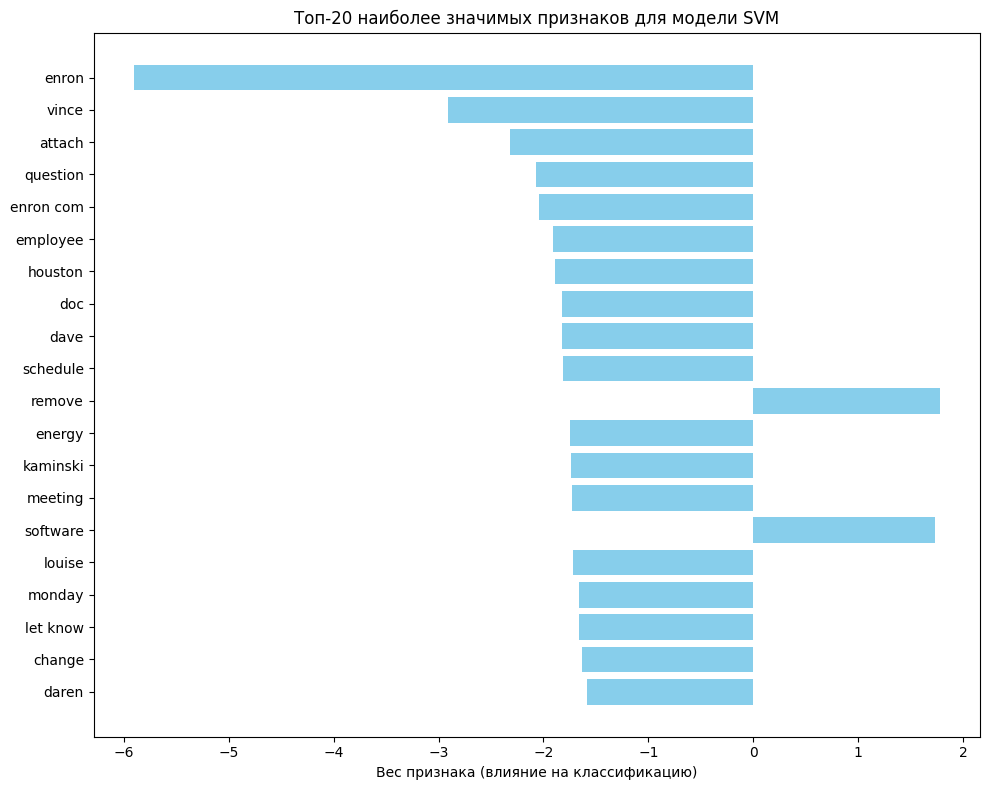

In [39]:
import matplotlib.pyplot as plt

# Получаем веса признаков из модели
feature_weights = svm_model.coef_[0]  # Убираем .toarray()

# Получаем имена TF-IDF признаков
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Добавляем числовые признаки к именам
combined_feature_names = list(tfidf_feature_names) + [
    'Special Char Count', 'Contains URL', 'Contains HTML',
    'Message Length', 'Unique Word Count', 'Symbols and Digits Ratio', 'Number Count'
]

# Объединяем имена признаков и их веса
feature_importance = sorted(
    zip(combined_feature_names, feature_weights),
    key=lambda x: abs(x[1]), reverse=True
)

# Берем топ-20 наиболее значимых признаков
top_features = feature_importance[:20]
feature_names, weights = zip(*top_features)

# Визуализация с использованием plt
plt.figure(figsize=(10, 8))
plt.barh(feature_names[::-1], weights[::-1], color='skyblue')
plt.xlabel("Вес признака (влияние на классификацию)")
plt.title("Топ-20 наиболее значимых признаков для модели SVM")
plt.tight_layout()
plt.show()


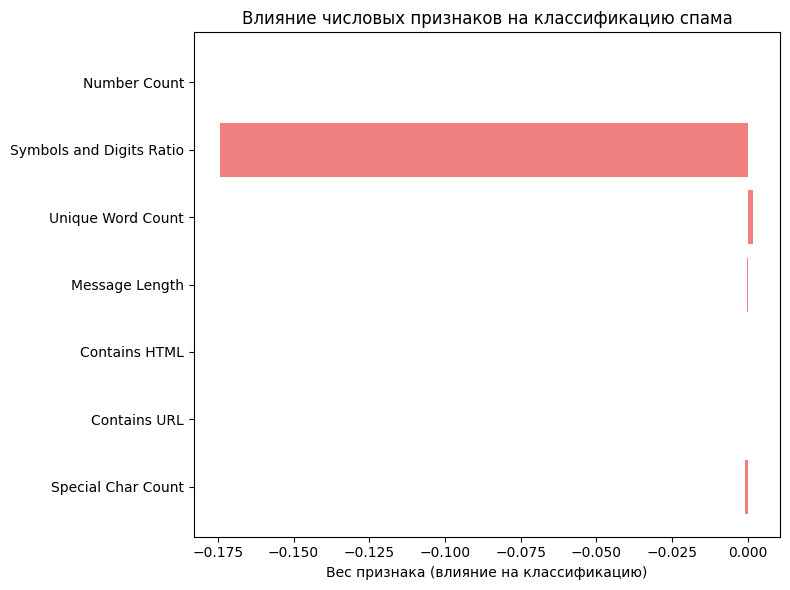

In [40]:
# Имена числовых признаков
numeric_feature_names = [
    'Special Char Count', 'Contains URL', 'Contains HTML',
    'Message Length', 'Unique Word Count',
    'Symbols and Digits Ratio', 'Number Count'
]

# Извлекаем веса числовых признаков (последние 7 весов в модели)
numeric_weights = feature_weights[-7:]

# Визуализация влияния числовых признаков
plt.figure(figsize=(8, 6))
plt.barh(numeric_feature_names, numeric_weights, color='lightcoral')
plt.xlabel("Вес признака (влияние на классификацию)")
plt.title("Влияние числовых признаков на классификацию спама")
plt.tight_layout()
plt.show()


In [ ]:
df.head()